<a href="https://colab.research.google.com/github/luiseduaardo/PneuModel/blob/main/treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/luiseduaardo/PneuModel
%cd PneuModel

Cloning into 'PneuModel'...
remote: Enumerating objects: 5854, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 5854 (delta 1), reused 5 (delta 0), pack-reused 5841 (from 2)
Receiving objects: 100% (5854/5854), 1.16 GiB | 41.87 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (5860/5860), done.
/content/PneuModel


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

path_treinamento = "./data/train"

#treino
train_generator = train_datagen.flow_from_directory(
    path_treinamento,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

#validação
val_generator = train_datagen.flow_from_directory(
    path_treinamento,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name='auc')]
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=5,
    restore_best_weights=True,
    mode='max'
)

checkpoint = ModelCheckpoint(
    'melhor_modelo_pneumonia.h5',
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    mode='max'
)

callbacks_list = [early_stop, checkpoint, reduce_lr]

In [9]:
history = model.fit(
    train_generator,
    epochs=20, # Limite alto, mas geralmente o EarlyStopping para antes
    validation_data=val_generator,
    callbacks=callbacks_list
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - auc: 0.8768 - loss: 0.3668

131/131 ━━━━━━━━━━━━━━━━━━━━ 129s 871ms/step - auc: 0.8772 - loss: 0.3663 - val_auc: 0.9187 - val_loss: 0.5354 - learning_rate: 0.0010
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - auc: 0.9588 - loss: 0.2267

131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 743ms/step - auc: 0.9588 - loss: 0.2267 - val_auc: 0.9636 - val_loss: 0.4568 - learning_rate: 0.0010
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - auc: 0.9694 - loss: 0.1946

131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 741ms/step - auc: 0.9694 - loss: 0.1947 - val_auc: 0.9712 - val_loss: 0.3256 - learning_rate: 0.0010
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - auc: 0.9613 - loss: 0.2164

131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 739ms/step - auc: 0.9613 - loss: 0.2163 - val_auc: 0.9745 - val_loss: 0.2501 - learning_rate: 0.0010
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - auc: 0.9735 - loss: 0.1824

131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 734ms/step - auc: 0.9735 - loss: 0.1824 - val_auc: 0.9803 - val_loss: 0.1833 - learning_rate: 0.0010
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - auc: 0.9728 - loss: 0.1843

131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 739ms/step - auc: 0.9729 - loss: 0.1842 - val_auc: 0.9843 - val_loss: 0.1437 - learning_rate: 0.0010
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 737ms/step - auc: 0.9741 - loss: 0.1800 - val_auc: 0.9798 - val_loss: 0.1570 - learning_rate: 0.0010
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - auc: 0.9759 - loss: 0.1673

131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 741ms/step - auc: 0.9759 - loss: 0.1673 - val_auc: 0.9845 - val_loss: 0.1469 - learning_rate: 0.0010
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 740ms/step - auc: 0.9761 - loss: 0.1703 - val_auc: 0.9839 - val_loss: 0.1520 - learning_rate: 0.0010
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 744ms/step - auc: 0.9740 - loss: 0.1836 - val_auc: 0.9843 - val_loss: 0.1360 - learning_rate: 0.0010
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 730ms/step - auc: 0.9765 - loss: 0.1674 - val_auc: 0.9831 - val_loss: 0.1526 - learning_rate: 0.0010
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 735ms/step - auc: 0.9830 - loss: 0.1480 - val_auc: 0.9831 - val_loss: 0.1372 - learning_rate: 2.0000e-04
Epoch 13/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - auc: 0.9760 - loss: 0.1752

131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 745ms/step - auc: 0.9761 - loss: 0.1750 - val_auc: 0.9876 - val_loss: 0.1245 - learning_rate: 2.0000e-04
Epoch 14/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 743ms/step - auc: 0.9852 - loss: 0.1341 - val_auc: 0.9816 - val_loss: 0.1476 - learning_rate: 2.0000e-04
Epoch 15/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - auc: 0.9815 - loss: 0.1544

131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 747ms/step - auc: 0.9815 - loss: 0.1544 - val_auc: 0.9876 - val_loss: 0.1202 - learning_rate: 2.0000e-04
Epoch 16/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - auc: 0.9769 - loss: 0.1680

131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 749ms/step - auc: 0.9769 - loss: 0.1679 - val_auc: 0.9884 - val_loss: 0.1153 - learning_rate: 2.0000e-04
Epoch 17/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 742ms/step - auc: 0.9835 - loss: 0.1438 - val_auc: 0.9859 - val_loss: 0.1240 - learning_rate: 2.0000e-04
Epoch 18/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - auc: 0.9828 - loss: 0.1467

131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 747ms/step - auc: 0.9828 - loss: 0.1467 - val_auc: 0.9885 - val_loss: 0.1189 - learning_rate: 2.0000e-04
Epoch 19/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 748ms/step - auc: 0.9834 - loss: 0.1425 - val_auc: 0.9873 - val_loss: 0.1202 - learning_rate: 2.0000e-04
Epoch 20/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - auc: 0.9843 - loss: 0.1436

131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 748ms/step - auc: 0.9843 - loss: 0.1436 - val_auc: 0.9896 - val_loss: 0.1129 - learning_rate: 4.0000e-05


In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

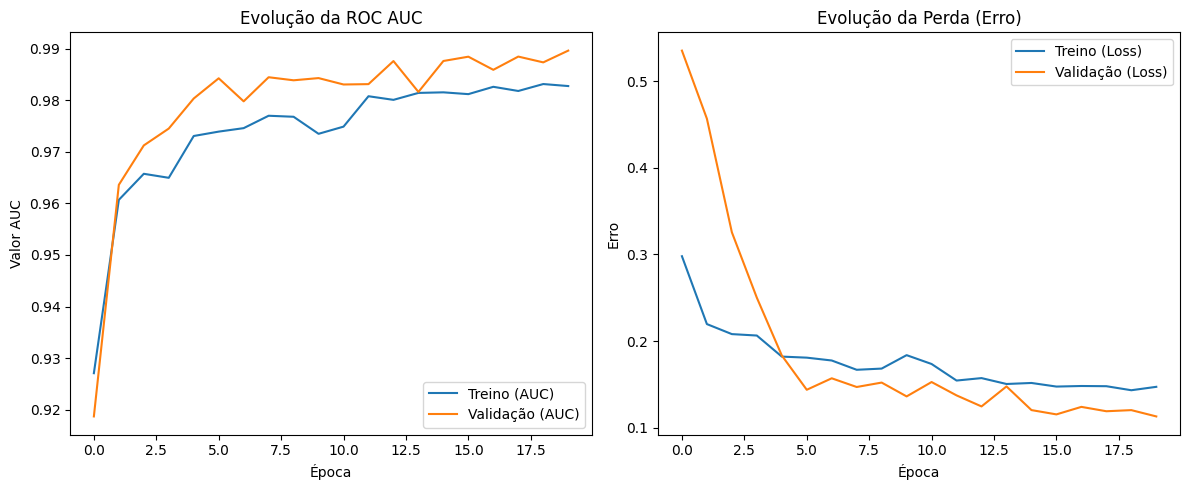

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Treino (AUC)')
plt.plot(history.history['val_auc'], label='Validação (AUC)')
plt.title('Evolução da ROC AUC')
plt.xlabel('Época')
plt.ylabel('Valor AUC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino (Loss)')
plt.plot(history.history['val_loss'], label='Validação (Loss)')
plt.title('Evolução da Perda (Erro)')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()

plt.tight_layout()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 695ms/step


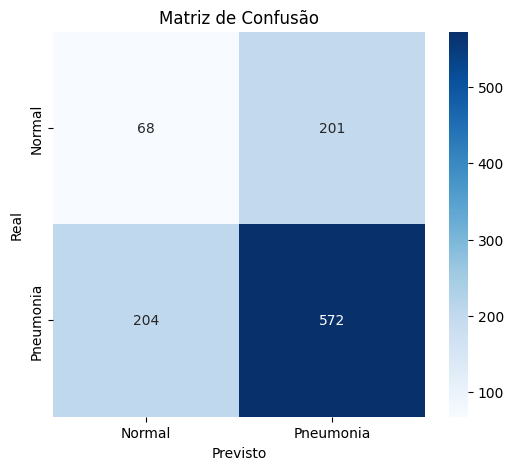

              precision    recall  f1-score   support

      Normal       0.25      0.25      0.25       269
   Pneumonia       0.74      0.74      0.74       776

    accuracy                           0.61      1045
   macro avg       0.49      0.49      0.49      1045
weighted avg       0.61      0.61      0.61      1045



In [12]:
val_generator.reset()
predictions = model.predict(val_generator)

y_pred = (predictions > 0.5).astype(int)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))